<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> House Price Prediction📈  </h2> </div> 

In [1]:

import pandas as pd 
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model

# machine Learning
from sklearn.linear_model import LinearRegression

# Warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
data = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.shape

(545, 13)

In [7]:
# Missing Values
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Exploratory Data Analysis 📊

In [8]:
num_col = ['price','area']

cat_col = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement',
           'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

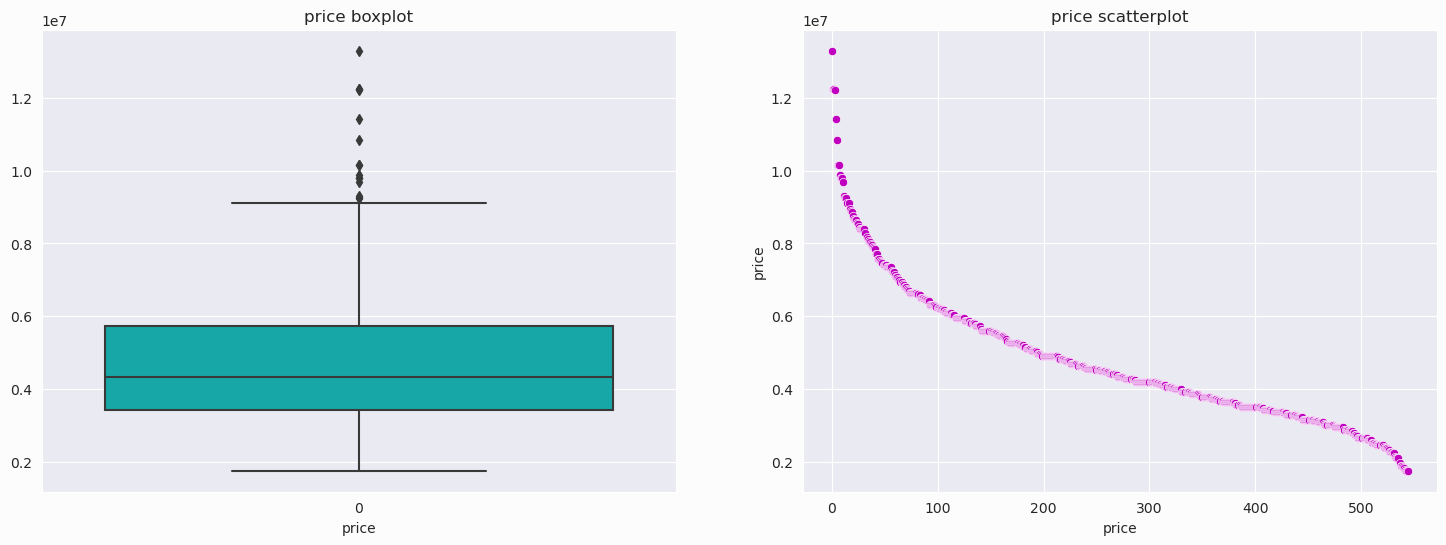

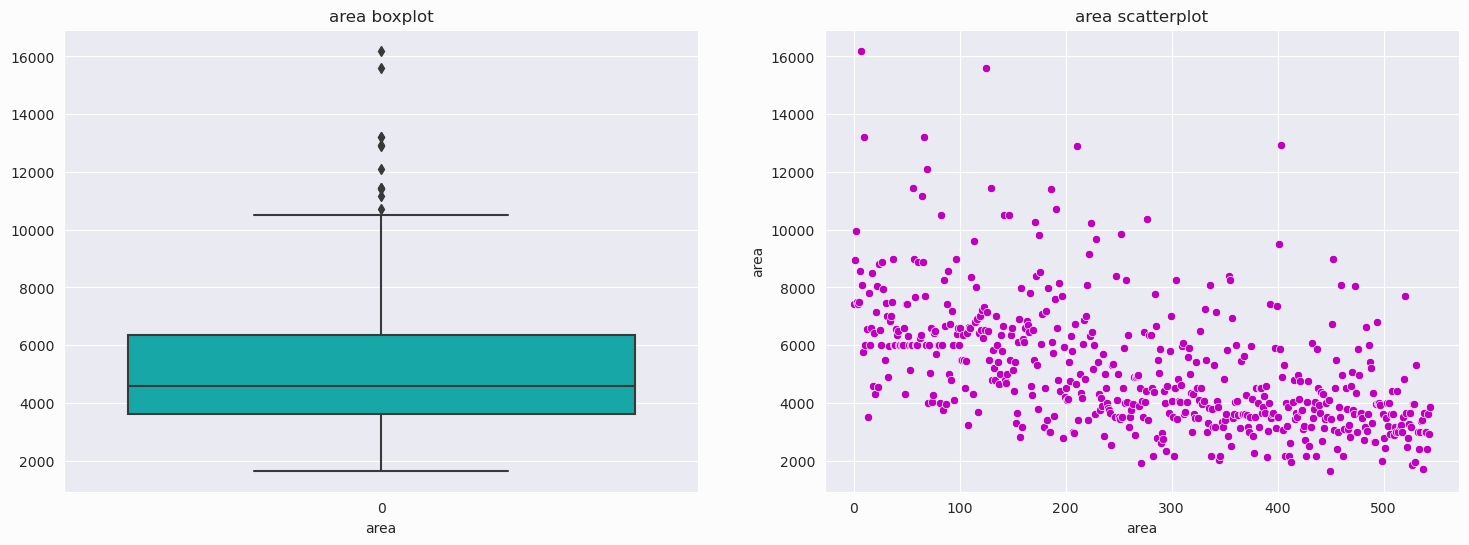

In [9]:
sns.set_style('darkgrid')
for feat in num_col:
    
    plt.figure(figsize=(18,6),edgecolor= 'blue',facecolor= '#FCFCFC')
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(data[feat],color='c')  #Boxplot
    plt.title(feat + ' boxplot')      # plot title
    plt.xlabel(feat,fontsize=10)      # X-axis label
    
    print('\n')
    
    ax2 = plt.subplot(1,2,2) 
    sns.scatterplot(data[feat],color='m') #Scatterplot
    plt.title(feat + ' scatterplot')       # plot title
    plt.xlabel(feat,fontsize=10)            # X-axis label
    plt.show()

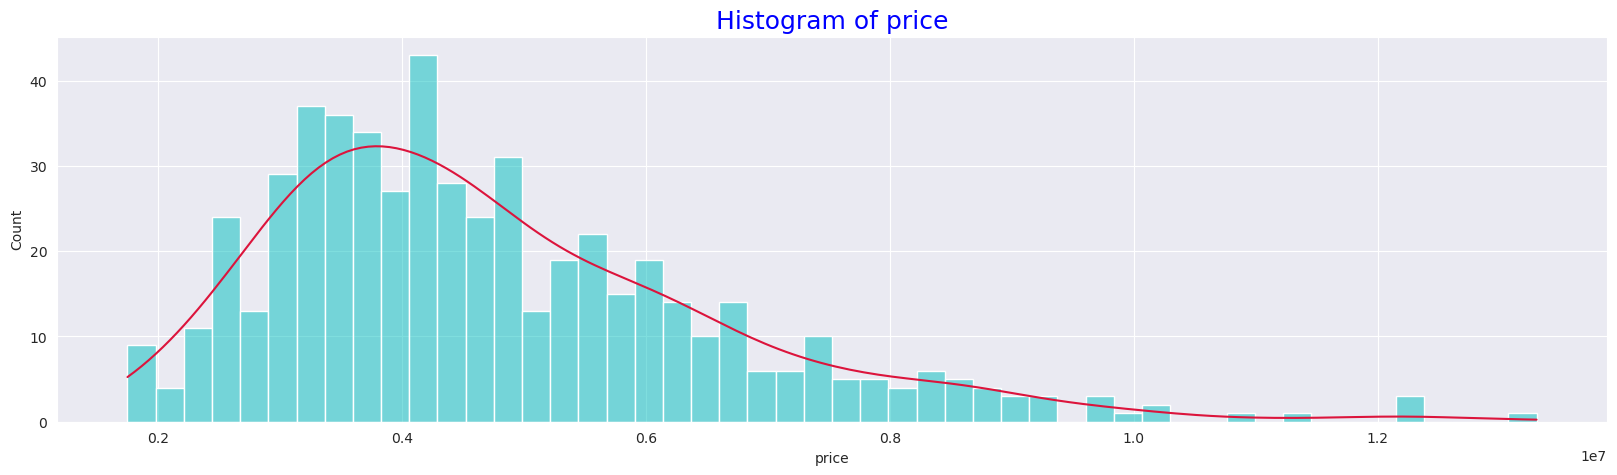

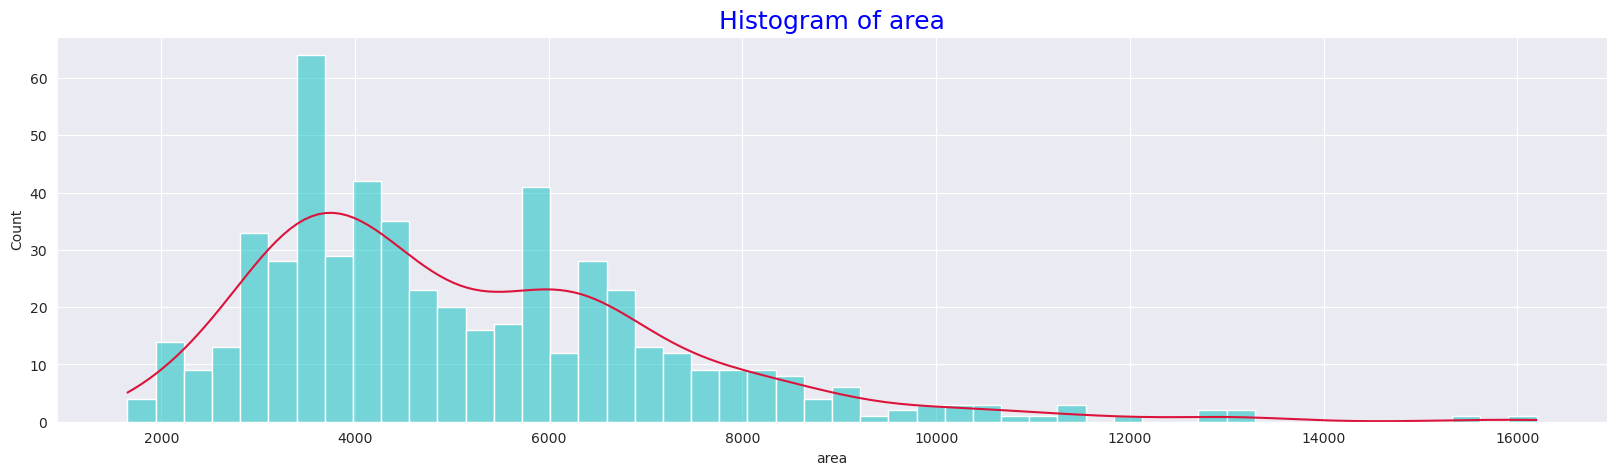

In [10]:
# plots for numerical columns
for i in num_col:
    plt.figure(figsize=(20,5))
    ax = sns.histplot(data=data,x=i,bins=50,kde=True,color='c')
    ax.lines[0].set_color('crimson')
    plt.title(f'Histogram of {i}',fontdict={'size':18,'color': 'blue'})
    plt.show()

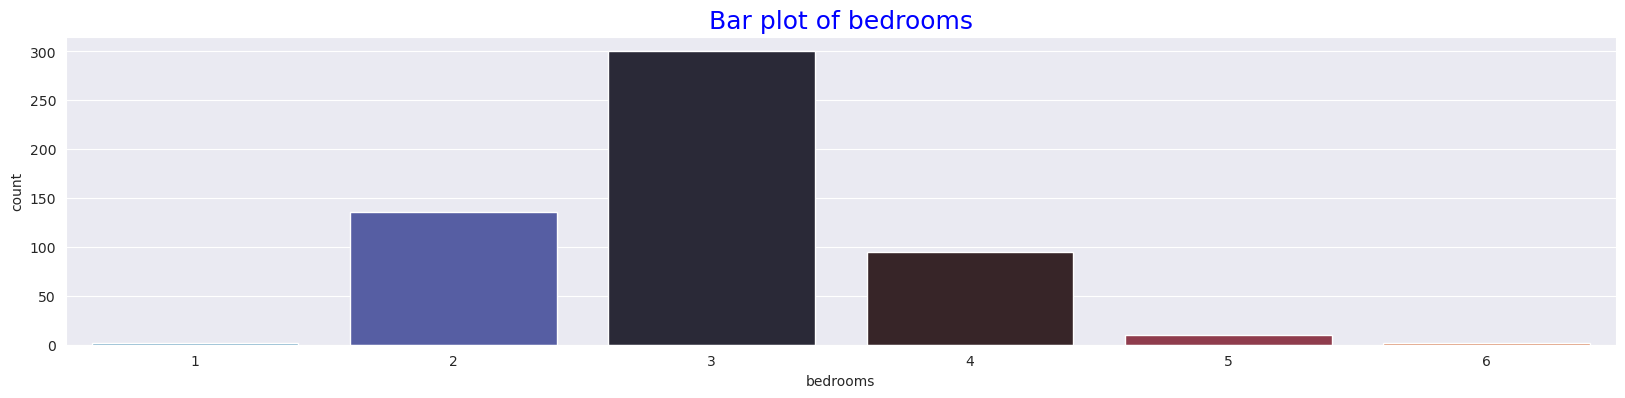

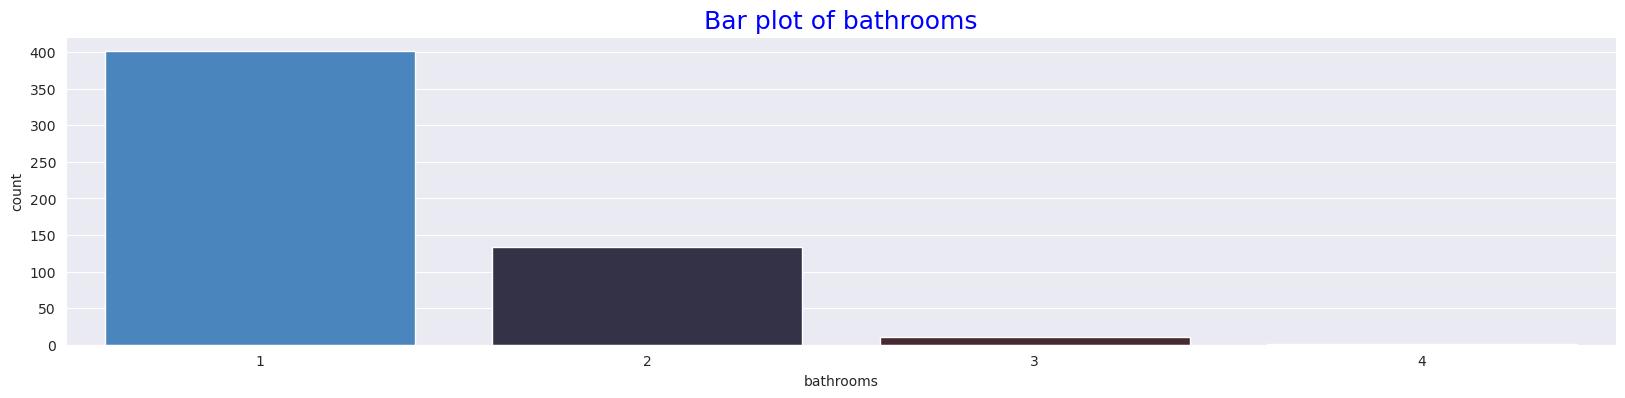

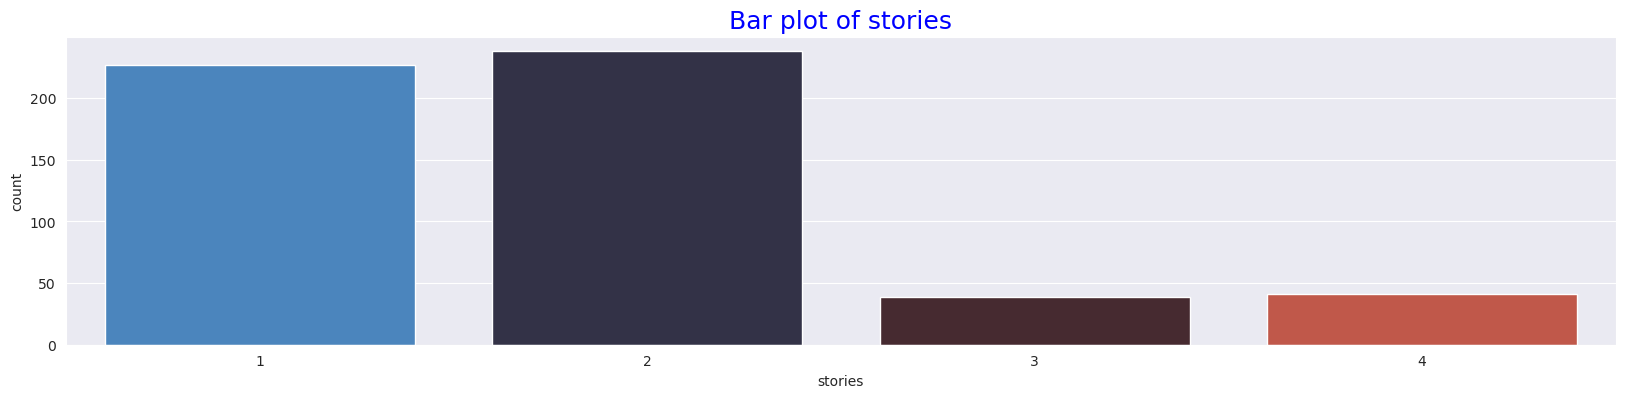

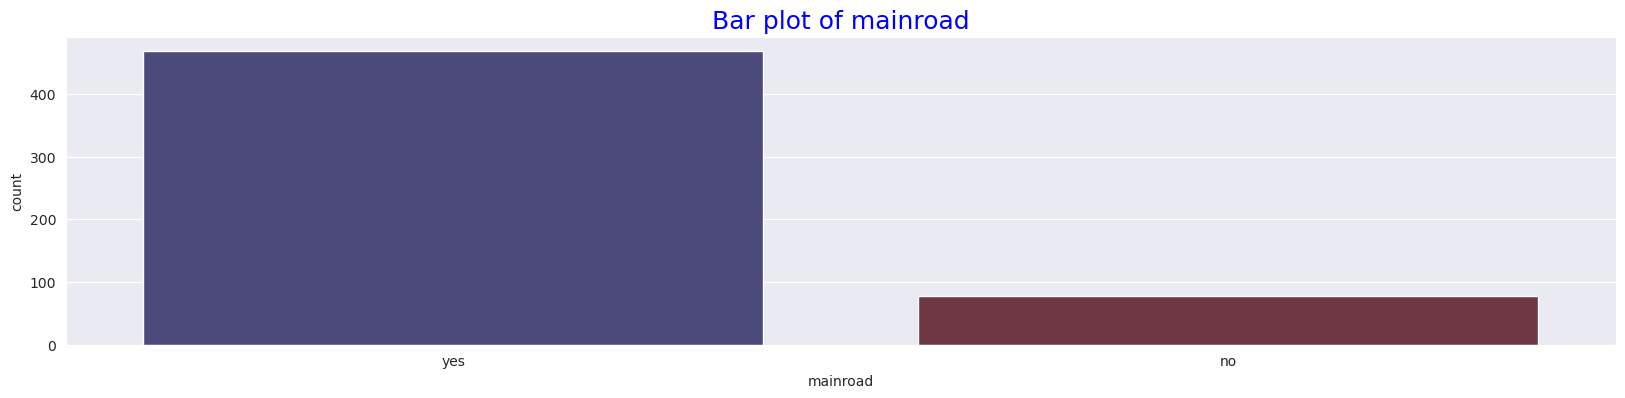

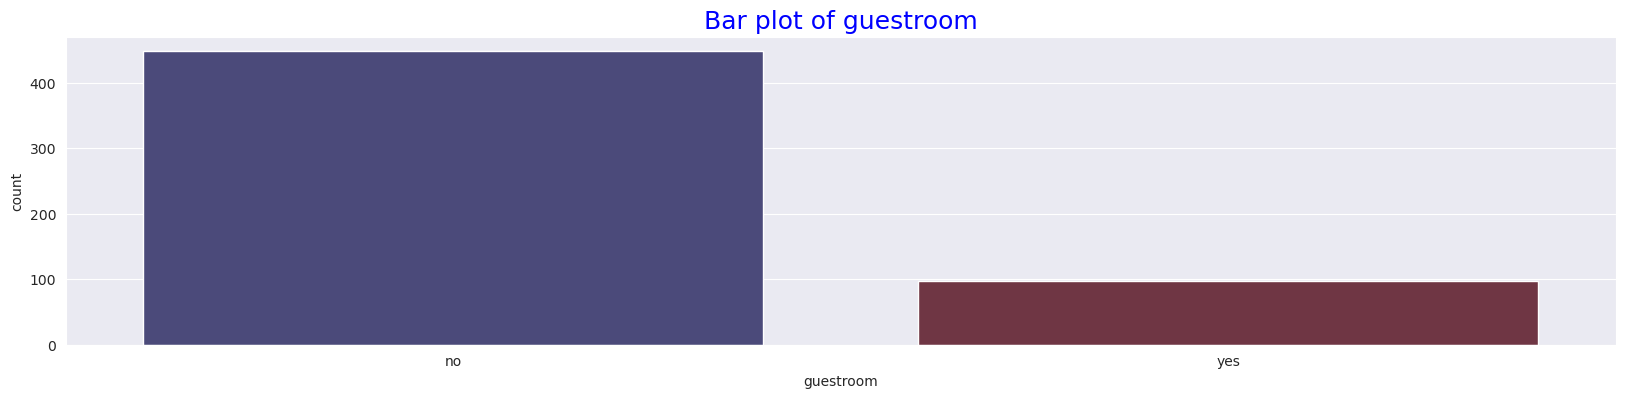

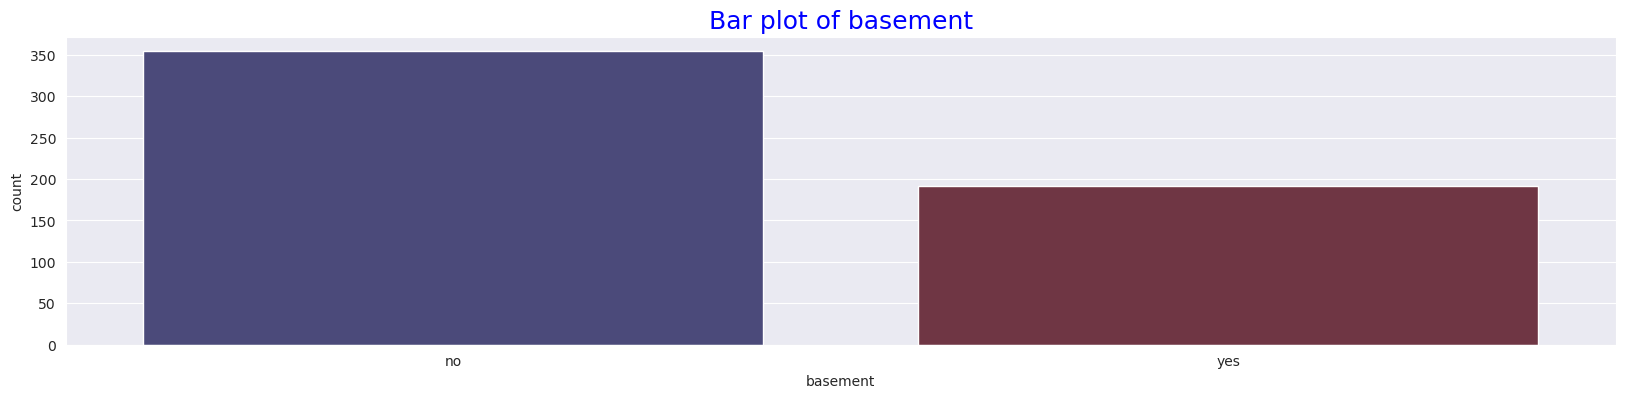

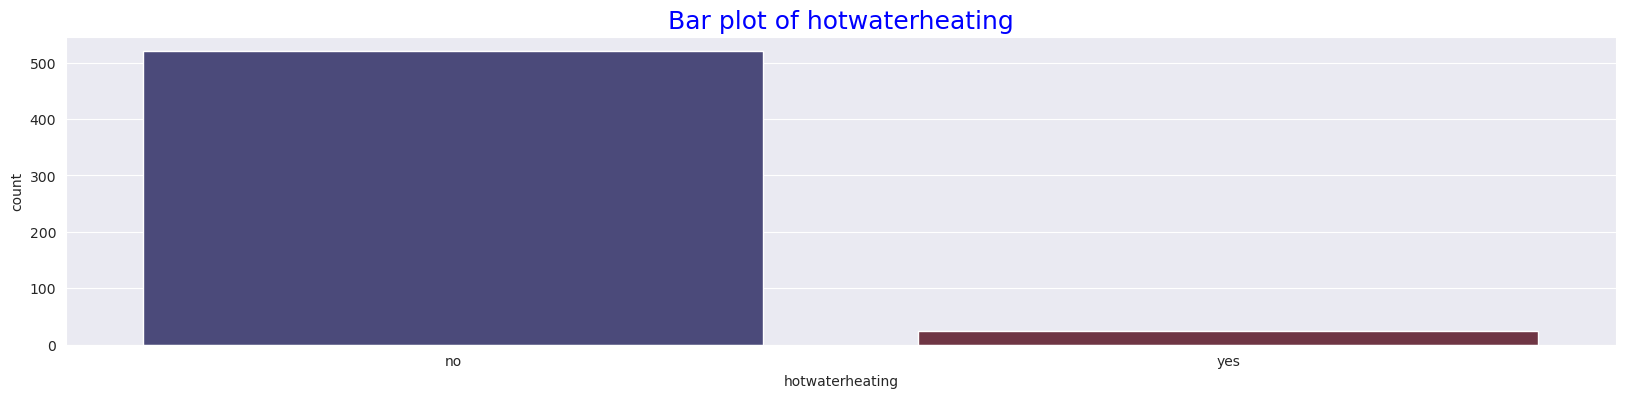

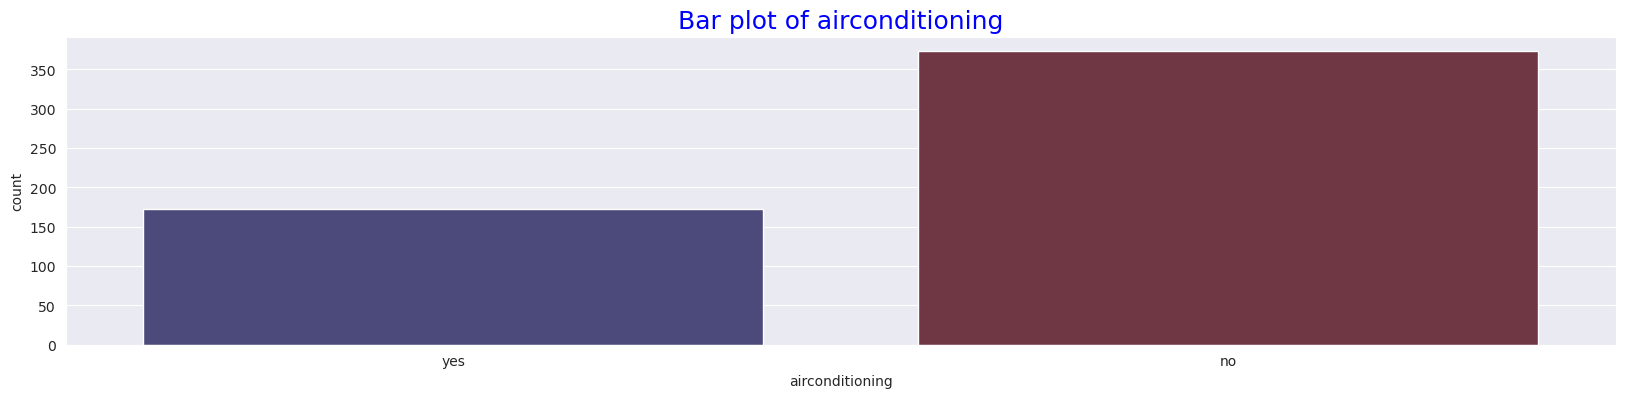

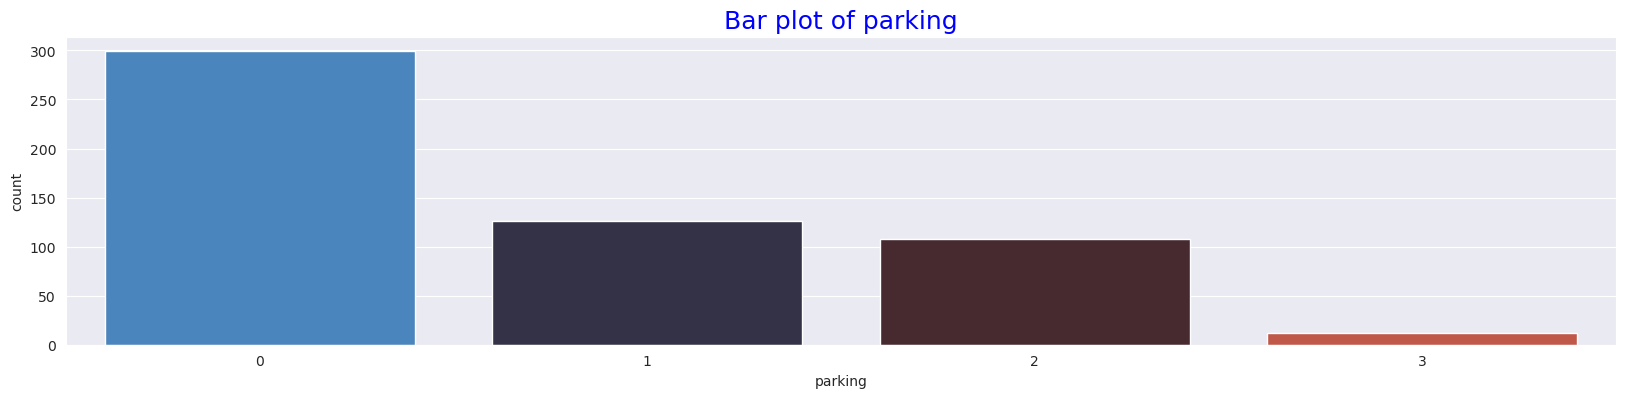

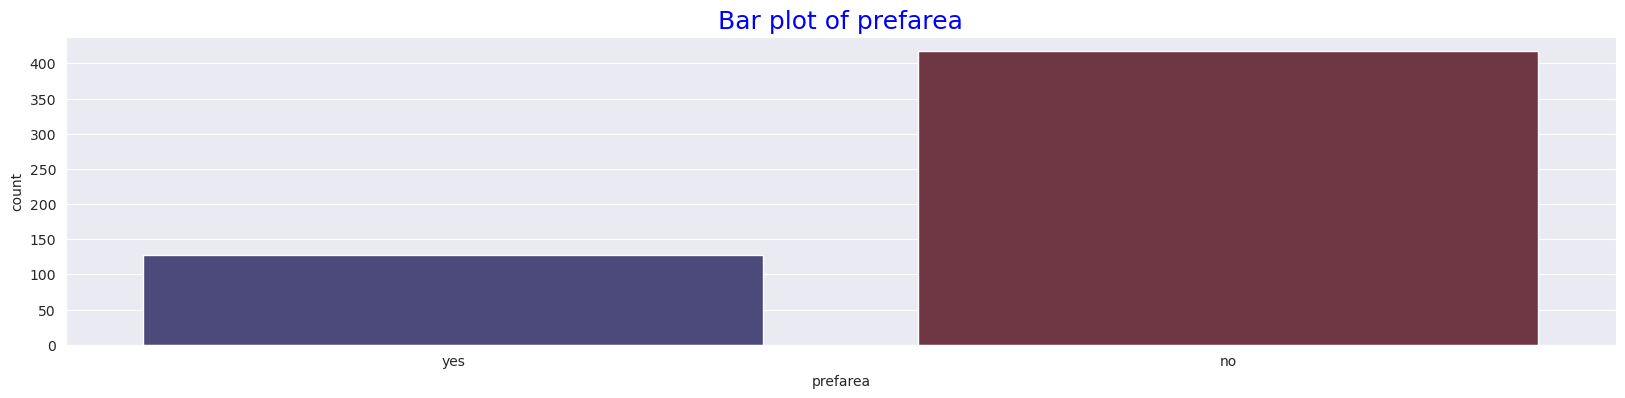

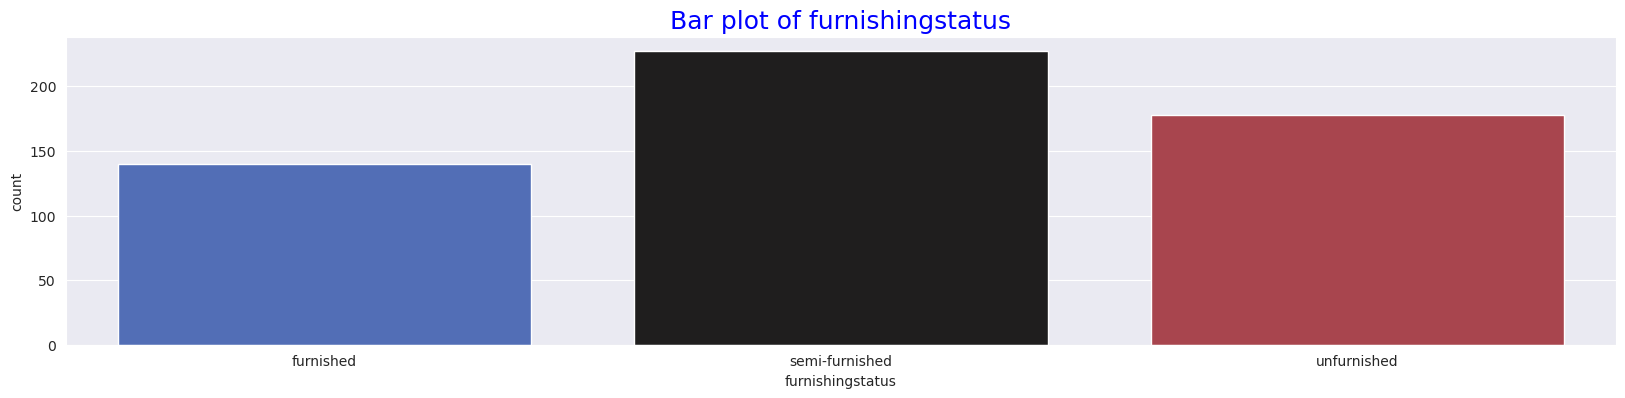

In [11]:
for i in cat_col:
    plt.figure(figsize=(20,4))
    sns.countplot(data=data,x=i,palette='icefire')
    plt.title(f'Bar plot of {i}',fontdict = {'size': 18,'color':'Blue'})
    plt.show()

<h2> Feature Enginering <h2> 


### Removing Outliers

In [12]:
# Removing Outliers 
data.drop(index= data[data.price>10000000].index,inplace=True)


### Feature Scaling

In [13]:
X = data.drop(columns='price')
y = data['price']/10000000            # divinding the price for normalization

feature_num = X.select_dtypes(exclude='object').columns
feature_cat = X.select_dtypes(include='object').columns
#X[feature_num] = X[feature_num]/X[feature_num].max()


### Preprocessing 

In [14]:
preprocessor = make_column_transformer((MinMaxScaler(),feature_num),
                                       (OneHotEncoder(handle_unknown='ignore'),feature_cat))

### Train Test Split  </div> 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [17]:
X_train.shape

(375, 20)

<a id ='8'> </a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model</h2> </div> 


### Model Layers

In [18]:
# Define Model layers
model = keras.Sequential([# Input Layer
                          layers.Dense(units=20, activation='relu', input_dim=X_train.shape[1]),
    
                          # Hidden Layers
                          layers.Dense(500,activation='relu'),   
                          layers.Dense(500,activation='relu'),
                          layers.Dense(500,activation='relu'),
    
                          # Output Layer
                          layers.Dense(1),
                         ])


# optimizer and loss for model
model.compile(optimizer='adam',
              loss='mae',
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
              )


# Early stopper to stop the epochs
early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,
                                             )
                                            

In [19]:
# Summery of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 500)               10500     
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 1)                 501       
                                                                 
Total params: 512,421
Trainable params: 512,421
Non-trainable params: 0
_________________________________________________________________


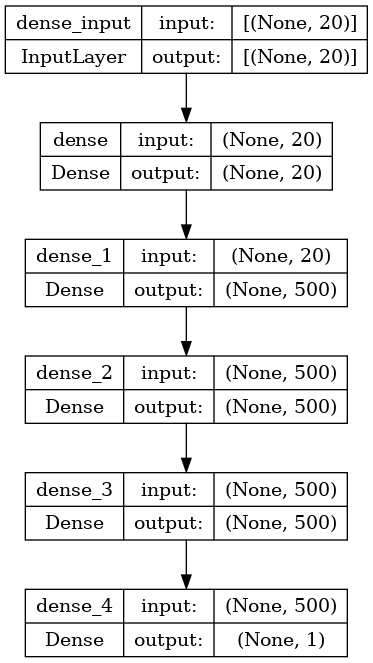

In [20]:
# Visulaiztion of model
plot_model(model,to_file='model.png',show_shapes=True)

<a id ='10'></a>
## Model fit

In [21]:
# fit the model
house_price = model.fit(X_train,y_train,
                      validation_data=(X_test,y_test),  # validation data
                      batch_size = 128,                 # number of inputs for optimizer
                      epochs = 400,                     # number of iteration
                      callbacks=[early_stoping],        # callback to stop iteration when val loss stops decreasing
                      verbose = 0
                      )


### Loss Plots

In [22]:
error = pd.DataFrame(house_price.history)

<Axes: title={'center': 'RMSE Loss'}>

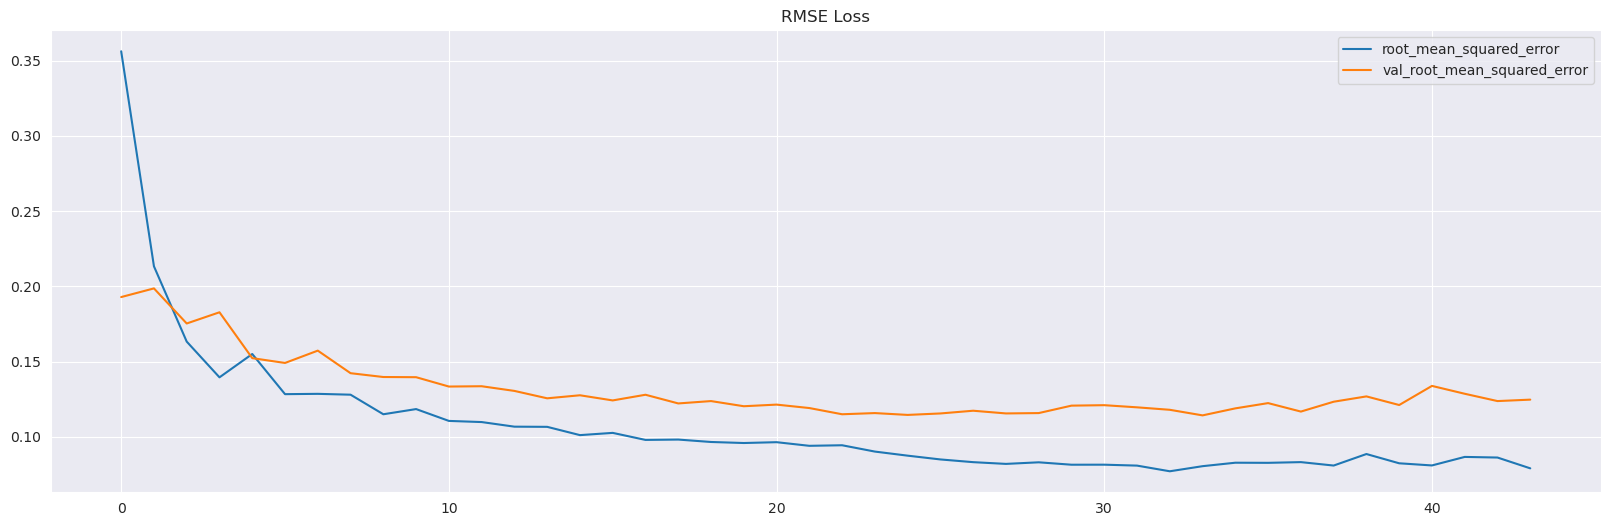

In [23]:
error.loc[:, ['root_mean_squared_error','val_root_mean_squared_error',]].plot(title="RMSE Loss",figsize=(20,6))

<Axes: title={'center': 'MAE Loss'}>

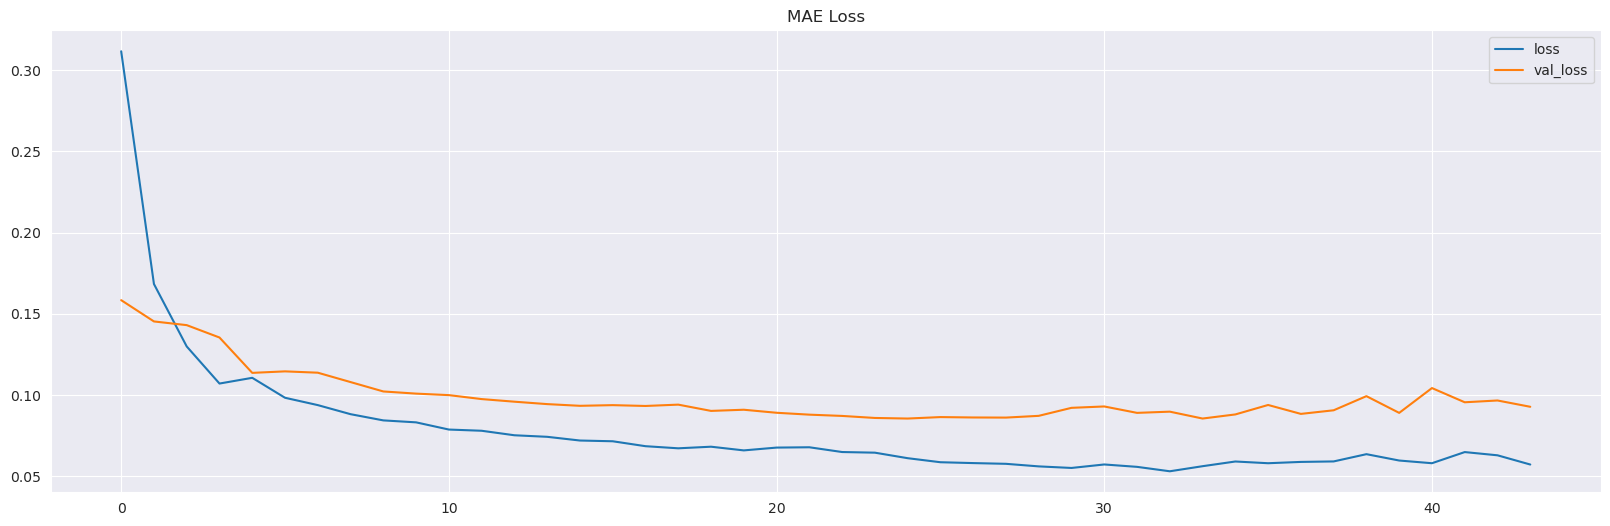

In [24]:
error.loc[:, ['loss','val_loss',]].plot(title="MAE Loss",figsize=(20,6))

<a id ='12'></a>
## Prediction

In [25]:
pred_train= model.predict(X_train)
print('RMSE of train data:',np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print('RMSE of test data:',np.sqrt(mean_squared_error(y_test,pred))) 

12/12 [==============================] - 0s 3ms/step
RMSE of train data: 0.0885128860908631
6/6 [==============================] - 0s 3ms/step
RMSE of test data: 0.11580013546280053


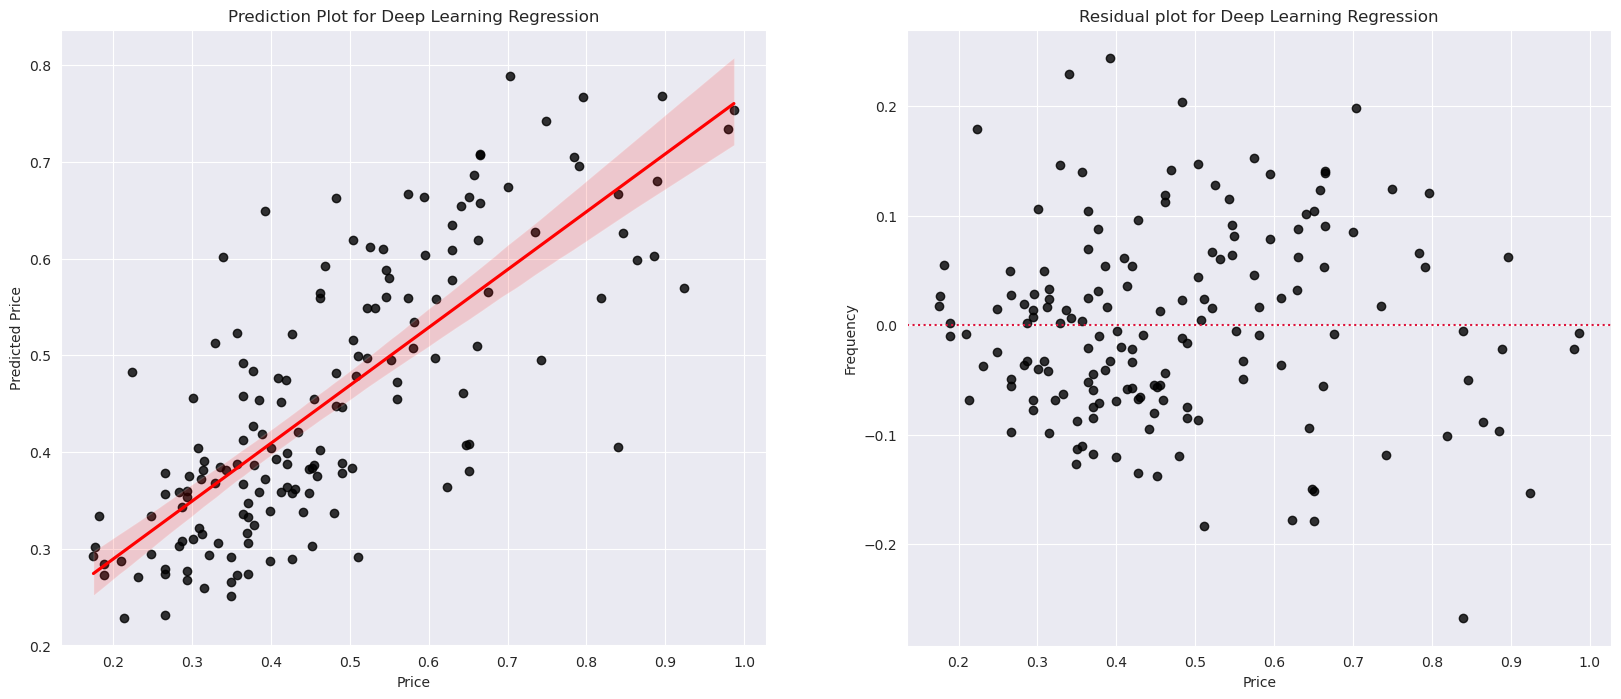

In [26]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
    
#Residual plot   
ax2 = plt.subplot(1,2,2) 
ax=sns.residplot(data= y,x=y_test,y=pred,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

<a id ='13'> </a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Machine Learning Model </h2> </div> 

In [27]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train= lr.predict(X_train)
rmse_train_lr=np.sqrt(mean_squared_error(y_train,pred_train))
print('RMSE of train data',rmse_train_lr)

pred = lr.predict(X_test)
rmse_test_lr = np.sqrt(mean_squared_error(y_test,pred))
print('RMSE of test data',rmse_test_lr) 

RMSE of train data 0.09468907792048911
RMSE of test data 0.10164689166370716


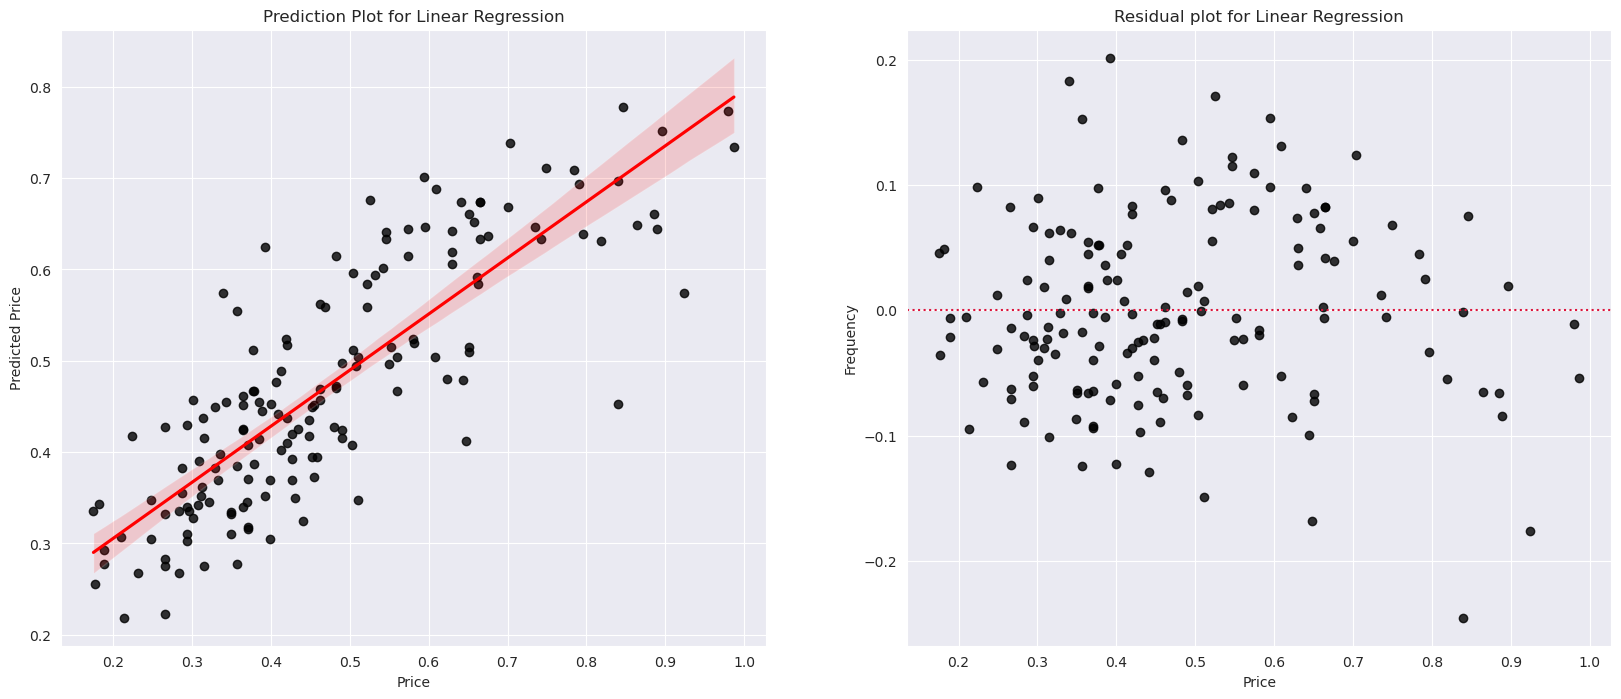

In [28]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
    
#Residual plot   
ax2 = plt.subplot(1,2,2) 
ax=sns.residplot(data= y,x=y_test,y=pred,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

## Conslusion

**Deep Learning model performs better than Linear Regression as RMSE of the deep learning model is smaller than the machine learning model.**